### Задание
Уменшить размерность векторного представления слов текстуальных данных.Построить граифики уменьшения размерности. 
    
1. Загрузка текстового файла из корневого каталога.
2. Обработка текстовых данных.
3. Понижение размерности текстовых данных.
4. Построить график объема информации. 
5. Сколько компонент нужно оставить что бы сохранить 90% информации. 
6. Попробовать восстановить пару исходных слов. 

### Анализ
- Токенизируем текст с помощью библиотеки spaCy.
- Преобразуем слова в векторы, используя Word2Vec векторизатор.
- Уменьшим размерность, используя PCA.
- Выберем количество компонент, при котором останется 90% информации, и восстановим часть текста.

### Имплементация
Загрузим текст

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import spacy


nlp = spacy.load('en_core_web_lg')

with open('../dz_3/text.txt', 'r', encoding='utf-8') as file:
    text = file.read()

doc = nlp(text)
words = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

Преобразуем слова в вектора

In [96]:
model = Word2Vec(sentences=[words], vector_size=768, window=5, min_count=1, workers=4)

word_vectors = model.wv
vocab = list(word_vectors.key_to_index)
X = word_vectors[vocab]

Построим график зависимости обьема информации от количества компонент

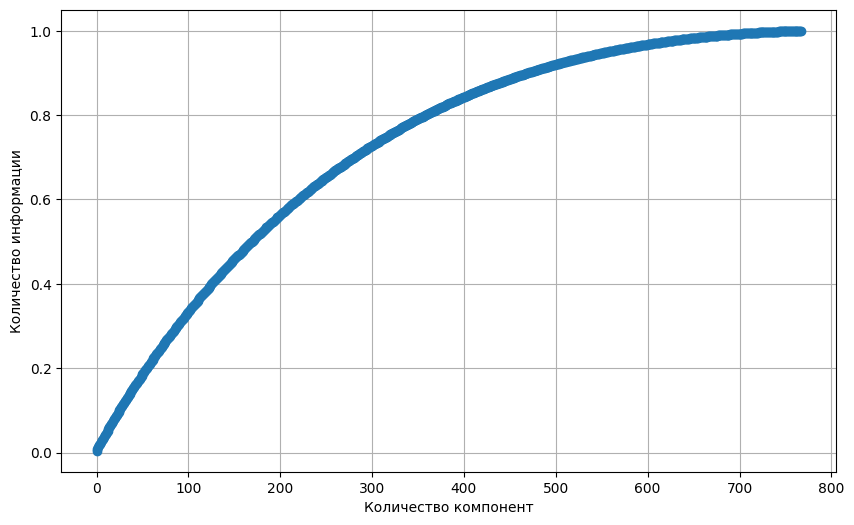

In [97]:
pca = PCA()
X_pca = pca.fit_transform(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Количество компонент')
plt.ylabel('Количество информации')
plt.grid(True)
plt.show()

Определим количество компонент для сохранения 90% информации и построим модель с этим количеством компонент

In [98]:
n_components_90 = np.argmax(cumulative_variance >= 0.9)
print(f'Количество компонент для сохранения 90% информации: {n_components_90}')

pca_90 = PCA(n_components=n_components_90)
X_pca_90 = pca_90.fit_transform(X)

Количество компонент для сохранения 90% информации: 470


Восстановим часть текста для анализа

In [99]:
def find_closest_word(vector, word_vectors):
    similarities = cosine_similarity([vector], word_vectors.vectors)
    closest_index = np.argmax(similarities)
    return word_vectors.index_to_key[closest_index]

X_reconstructed = pca_90.inverse_transform(X_pca_90)

num_words_to_reconstruct = 1000
original_text = []
reconstructed_text = []

for i in range(num_words_to_reconstruct):
    original_text.append(words[i])
    word_index = vocab.index(words[i])
    reconstructed_vector = X_reconstructed[word_index]
    reconstructed_text.append(find_closest_word(reconstructed_vector, word_vectors))

print(f'Оригинальный текст: \n"{" ".join(original_text)}"\n\n\n\n')
print(f'Восстановленный текст:\n"{" ".join(reconstructed_text)}"')

Оригинальный текст: 
"sinews peace winston churchill glad come westminster college afternoon complimented degree westminster familiar heard westminster received large education politics dialectic rhetoric things fact educated similar rate kindred establishments honor unique private visitor introduced academic audience president united states amid heavy burdens duties responsibilities unsought recoiled president traveled thousand miles dignify magnify meeting today opportunity addressing kindred nation countrymen ocean countries president told wish sure liberty true faithful counsel anxious baffling times shall certainly avail freedom feel right private ambitions cherished younger days satisfied wildest dreams let clear official mission status kind speak allow mind experience lifetime play problems beset morrow absolute victory arms try sure strength gained sacrifice suffering shall preserved future glory safety mankind united states stands time pinnacle world power solemn moment americ

### Выводы
- Изучили базовые принципы уменьшения размерности пространства.
- Преобразовати текст в векторное представление.
- Определили количество компонент, необходимых для сохранения 90% информации.
- Уменьшили размерность используя PCA.
- Восстановили текст после уменьшения размерности. Существенная деградация модели наблюдается при 25 и менее числе компонент. При большем текст восстанавливается.